In [ ]:
# Import libraries
import math
!pip install yfinance 
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler 
import matplotlib.pyplot as plt
from datetime import datetime
import plotly.graph_objects as go
import matplotlib.style
from sklearn.svm import SVR

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install bayesian-optimization
from bayes_opt import BayesianOptimization

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Set plotting style
plt.style.use('fivethirtyeight')
layout=go.Layout(paper_bgcolor='rgba(0,0,0,0)', plot_bgcolor='rgba(250,250,250,0.8)')
fig = go.Figure(layout=layout)


In [ ]:
# Download data
symbol = 'AAPL'

#df=pd.DataFrame()
start='2020-7-01'
end='2022-10-15'
df = yf.download(symbol, start, end)

#df = df.to_frame()

#data.reset_index(inplace=True)

[*********************100%***********************]  1 of 1 completed


In [ ]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-07-01,91.279999,91.839996,90.977501,91.027496,89.494583,110737200
2020-07-02,91.962502,92.617500,90.910004,91.027496,89.494583,114041600
2020-07-06,92.500000,93.945000,92.467499,93.462502,91.888573,118655600
2020-07-07,93.852501,94.654999,93.057503,93.172501,91.603439,112424400
2020-07-08,94.180000,95.375000,94.089996,95.342499,93.736900,117092000
...,...,...,...,...,...,...
2022-10-10,140.419998,141.889999,138.570007,140.419998,139.973724,74899000
2022-10-11,139.899994,141.350006,138.220001,138.979996,138.538300,77033700
2022-10-12,139.130005,140.360001,138.160004,138.339996,137.900330,70433700


In [ ]:
#When the short-term SMA (SMA short) crosses above the long-term SMA (SMA long), 
# it indicates a bullish signal, so we should buy the stock.

# When the short-term SMA (SMA short) crosses below the long-term SMA (SMA long), 
# it indicates a bearish signal, so we should sell the stock.


In [ ]:
# Add SMA short and SMA long columns to the data
df['SMA1'] = df['Close'].rolling(window=20).mean()
df['SMA2'] = df['Close'].rolling(window=400).mean()

df['Position'] = np.where(df['SMA1'] > df['SMA2'], 1, -1)  

In [ ]:
df

,Open,High,Low,Close,Adj Close,Volume,SMA1,SMA2,Position
Date,,,,,,,,,
2020-07-01,91.279999,91.839996,90.977501,91.027496,89.494583,110737200,NaN,NaN,-1
2020-07-02,91.962502,92.617500,90.910004,91.027496,89.494583,114041600,NaN,NaN,-1
2020-07-06,92.500000,93.945000,92.467499,93.462502,91.888573,118655600,NaN,NaN,-1
2020-07-07,93.852501,94.654999,93.057503,93.172501,91.603439,112424400,NaN,NaN,-1
2020-07-08,94.180000,95.375000,94.089996,95.342499,93.736900,117092000,NaN,NaN,-1
...,...,...,...,...,...,...,...,...,...
2022-10-10,140.419998,141.889999,138.570007,140.419998,139.973724,74899000,148.721497,150.624150,-1
2022-10-11,139.899994,141.350006,138.220001,138.979996,138.538300,77033700,147.978497,150.666700,-1
2022-10-12,139.130005,140.360001,138.160004,138.339996,137.900330,70433700,147.129997,150.709975,-1


In [ ]:
!pip install mplfinance
import mplfinance as mpf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Reset the index of the DataFrame
df = df.reset_index()

In [ ]:
df.dropna()

,Date,Open,High,Low,Close,Adj Close,Volume,SMA1,SMA2,Position
399,2022-01-31,170.160004,175.000000,169.509995,174.779999,173.506561,115541600,169.861500,134.019831,1
400,2022-02-01,174.009995,174.839996,172.309998,174.610001,173.337799,86213900,169.491500,134.228787,1
401,2022-02-02,174.750000,175.880005,173.330002,175.839996,174.558823,84914300,169.298500,134.440819,1
402,2022-02-03,174.479996,176.240005,172.119995,172.899994,171.640244,89418100,169.197500,134.639412,1
403,2022-02-04,171.679993,174.100006,170.679993,172.389999,171.352020,82465400,169.217000,134.837456,1
...,...,...,...,...,...,...,...,...,...,...
573,2022-10-10,140.419998,141.889999,138.570007,140.419998,139.973724,74899000,148.721497,150.624150,-1
574,2022-10-11,139.899994,141.350006,138.220001,138.979996,138.538300,77033700,147.978497,150.666700,-1
575,2022-10-12,139.130005,140.360001,138.160004,138.339996,137.900330,70433700,147.129997,150.709975,-1
576,2022-10-13,134.990005,143.589996,134.369995,142.990005,142.535583,113224000,146.660998,150.757475,-1


In [ ]:
# Plot the candlestick chart with moving averages and position signal
import plotly.graph_objects as go

# Define data
data = go.Ohlc(x=df['Date'],
               open=df['Open'],
               high=df['High'],
               low=df['Low'],
               close=df['Close'])

# Calculate SMA1 and SMA2
sma1 = df['Close'].rolling(window=20).mean()
sma2 = df['Close'].rolling(window=50).mean()

# Add SMA1 and SMA2 as scatter traces
sma1_trace = go.Scatter(x=df['Date'], y=sma1, mode='lines', name='SMA1', line=dict(color='orange'))
sma2_trace = go.Scatter(x=df['Date'], y=sma2, mode='lines', name='SMA2', line=dict(color='purple'))

# Create figure and add traces
fig = go.Figure(data=data)
fig.add_trace(sma1_trace)
fig.add_trace(sma2_trace)

# Show figure
fig.show()


In [ ]:
df['Returns'] = np.log(df['Close'] / df['Close'].shift(1))  

In [ ]:
df['Strategy'] = df['Position'].shift(1) * df['Returns']  

In [ ]:
df.round(4).head()

,Date,Open,High,Low,Close,Adj Close,Volume,SMA1,SMA2,Position,Returns,Strategy
0,2020-07-01,91.2800,91.8400,90.9775,91.0275,89.4946,110737200,NaN,NaN,-1,NaN,NaN
1,2020-07-02,91.9625,92.6175,90.9100,91.0275,89.4946,114041600,NaN,NaN,-1,0.0000,-0.0000
2,2020-07-06,92.5000,93.9450,92.4675,93.4625,91.8886,118655600,NaN,NaN,-1,0.0264,-0.0264
3,2020-07-07,93.8525,94.6550,93.0575,93.1725,91.6034,112424400,NaN,NaN,-1,-0.0031,0.0031
4,2020-07-08,94.1800,95.3750,94.0900,95.3425,93.7369,117092000,NaN,NaN,-1,0.0230,-0.0230


In [ ]:
df.dropna(inplace=True)

In [ ]:
np.exp(df[['Returns', 'Strategy']].sum())  


Returns     0.812423
Strategy    0.704207
dtype: float64

In [ ]:
df[['Returns', 'Strategy']].std() * 252 ** 0.5 
# Calculates the annualized volatility for the strategy and 
# the benchmark investment.


Returns     0.344352
Strategy    0.343434
dtype: float64

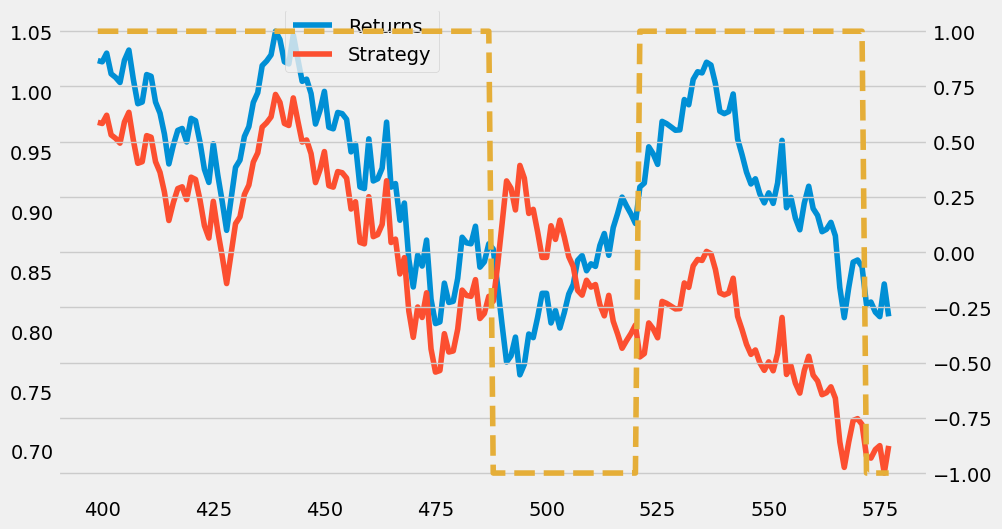

In [ ]:
ax = df[['Returns', 'Strategy']].cumsum(
        ).apply(np.exp).plot(figsize=(10, 6))
df['Position'].plot(ax=ax, secondary_y='Position', style='--')
ax.get_legend().set_bbox_to_anchor((0.25, 0.85));


In [ ]:
# Define the range of values for SMA1 and SMA2
sma1_values = [10, 15,20, 25, 30, 35, 40, 50, 55, 60]
sma2_values = [70, 80, 100, 150, 200, 250, 300]

# Initialize variables to store the optimal values and corresponding returns
optimal_sma1 = 0
optimal_sma2 = 0
max_returns = float('-inf')

# Iterate over all possible combinations of SMA1 and SMA2
for sma1 in sma1_values:
    for sma2 in sma2_values:
        # Skip if SMA1 is greater than or equal to SMA2
        if sma1 >= sma2:
            continue
        # Calculate the position signal based on the current SMA values
        df['Position'] = np.where(df['Close'].rolling(window=sma1).mean() > df['Close'].rolling(window=sma2).mean(), 1, -1)
        # Calculate the daily returns for the trading strategy
        df['Strategy'] = df['Position'].shift(1) * df['Returns']
        # Calculate the cumulative returns
        cumulative_returns = np.exp(df['Strategy'].cumsum().iloc[-1])
        # Update the optimal values and returns if the current combination yields higher returns
        if cumulative_returns > max_returns:
            optimal_sma1 = sma1
            optimal_sma2 = sma2
            max_returns = cumulative_returns

# Print the optimal values and returns
print('Optimal SMA1: ', optimal_sma1)
print('Optimal SMA2: ', optimal_sma2)
print('Max returns: ', max_returns)


Optimal SMA1:  10
Optimal SMA2:  200
Max returns:  1.263043739066998


In [ ]:
#Bayesian Optimization

In [ ]:
# Define the range of values for SMA1 and SMA2
sma1_values = [10, 15, 20, 25, 30, 35, 40, 50, 52, 55, 60]
sma2_values = [50, 60, 70, 100, 150, 200, 250, 300, 350, 400, 500]

# Calculate the daily returns for the trading strategy
df['Returns'] = np.log(df['Close'] / df['Close'].shift(1))

# Initialize variables to store the optimal values and corresponding returns
optimal_sma1 = 0
optimal_sma2 = 0
max_returns = float('-inf')

# Check if the 'Returns' column exists in the DataFrame
if 'Returns' not in df.columns:
    raise ValueError("The 'Returns' column is missing in the DataFrame")

# Iterate over all possible combinations of SMA1 and SMA2
for sma1 in sma1_values:
    for sma2 in sma2_values:
        # Skip if SMA1 is greater than or equal to SMA2
        if sma1 >= sma2:
            continue
        # Calculate the position signal based on the current SMA values
        df['Position'] = np.where(df['Close'].rolling(window=sma1).mean() > df['Close'].rolling(window=sma2).mean(), 1, -1)
        # Calculate the daily returns for the trading strategy
        df['Strategy'] = df['Position'].shift(1) * df['Returns']
        # Calculate the cumulative returns
        cumulative_returns = np.exp(df['Strategy'].cumsum().iloc[-1])
        # Update the optimal values and returns if the current combination yields higher returns
        if cumulative_returns > max_returns:
            optimal_sma1 = sma1
            optimal_sma2 = sma2
            max_returns = cumulative_returns

# Print the optimal values and returns
print('Optimal SMA1: ', optimal_sma1)
print('Optimal SMA2: ', optimal_sma2)
print('Max returns: ', max_returns)


Optimal SMA1:  10
Optimal SMA2:  50
Max returns:  1.3215759962013873


In [ ]:
# Define function to optimize
def optimize_sma(sma1, sma2):
    # # Download data
    # symbol = 'AAPL'
    # df = yf.download(symbol, start='2016-9-29', end='2021-9-29')
    
    # Add SMA short and SMA long columns to the data
    df['SMA1'] = df['Close'].rolling(window=int(sma1)).mean()
    df['SMA2'] = df['Close'].rolling(window=int(sma2)).mean()
    
    # Create a column to store the position signal based on the current SMA values
    df['Position'] = np.where(df['SMA1'] > df['SMA2'], 1, -1)
    
    # Create a column to store the daily returns for the trading strategy
    df['Returns'] = np.log(df['Close'] / df['Close'].shift(1))
    df['Strategy'] = df['Position'].shift(1) * df['Returns']
    
    # Calculate the cumulative returns
    cumulative_returns = np.exp(df['Strategy'].cumsum().iloc[-1])
    
    # Return the negative of the cumulative returns, as the Bayesian Optimization minimizes the function
    return -cumulative_returns

In [ ]:
# Set ranges for SMA1 and SMA2 values
pbounds = {'sma1': (10, 60), 'sma2': (50, 500)}

# Initialize optimizer object
optimizer = BayesianOptimization(
    f=optimize_sma,
    pbounds=pbounds,
    random_state=1,
)

# Maximize function using Bayesian Optimization
optimizer.maximize(
    init_points=100,
    n_iter=100,
)

|   iter    |  target   |   sma1    |   sma2    |
-------------------------------------------------
| 1         | -1.263    | 30.85     | 374.1     |
| 2         | -1.263    | 10.01     | 186.0     |
| 3         | -0.9286   | 17.34     | 91.55     |
| 4         | -1.263    | 19.31     | 205.5     |
| 5         | -1.263    | 29.84     | 292.5     |
| 6         | -1.263    | 30.96     | 358.3     |
| 7         | -1.263    | 20.22     | 445.2     |
| 8         | -1.263    | 11.37     | 351.7     |
| 9         | -1.263    | 30.87     | 301.4     |
| 10        | -0.9841   | 17.02     | 139.1     |
| 11        | -1.263    | 50.04     | 485.7     |
| 12        | -1.263    | 25.67     | 361.5     |
| 13        | -1.263    | 53.82     | 452.6     |
| 14        | -1.241    | 14.25     | 67.57     |
| 15        | -1.263    | 18.49     | 445.2     |
| 16        | -1.263    | 14.92     | 239.5     |
| 17        | -1.263    | 57.89     | 289.9     |
| 18        | -1.263    | 44.59     | 192.0     |


In [ ]:
# Print optimal values and corresponding returns
print("Optimal SMA1: ", round(optimizer.max['params']['sma1']))
print("Optimal SMA2: ", round(optimizer.max['params']['sma2']))
print('Max returns: ', optimizer.max['target'])


Optimal SMA1:  60
Optimal SMA2:  69
Max returns:  -0.640602547337243


In [ ]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [ ]:
# Define the function to be optimized
def optimize_sma(sma1, sma2):
    
    # Add SMA short and SMA long columns to the data
    df['SMA1'] = df['Close'].rolling(window=int(sma1)).mean()
    df['SMA2'] = df['Close'].rolling(window=int(sma2)).mean()
    
    # Create a column to store the position signal based on the current SMA values
    df['Position'] = np.where(df['SMA1'] > df['SMA2'], 1, -1)
    
    # Create a column to store the daily returns for the trading strategy
    df['Returns'] = np.log(df['Close'] / df['Close'].shift(1))
    df['Strategy'] = df['Position'].shift(1) * df['Returns']
    
    # Calculate the cumulative returns
    cumulative_returns = np.exp(df['Strategy'].cumsum().iloc[-1])
    
    # Return the negative of the cumulative returns, as the SVR minimizes the function
    return -cumulative_returns


In [ ]:
df = yf.download(symbol, start, end)

# Define the search space for SMA1 and SMA2 values
sma1_values = np.arange(10, 61)
sma2_values = np.arange(50, 501)

In [ ]:
# Create a grid of SMA1 and SMA2 values
sma1_grid, sma2_grid = np.meshgrid(sma1_values, sma2_values)
sma1_grid = sma1_grid.ravel()
sma2_grid = sma2_grid.ravel()

# Initialize the inputs and targets for the SVR
X = np.column_stack((sma1_grid, sma2_grid))
y = np.zeros_like(X[:, 0])

In [ ]:
# Create a pipeline for the SVR
model = make_pipeline(StandardScaler(), SVR())

# Train the SVR and obtain the predictions
model.fit(X, y)
y_pred = model.predict(X)

# Calculate the mean squared error of the predictions
mse = mean_squared_error(y, y_pred)

# Find the SMA1 and SMA2 values that minimize the mean squared error
idx_min_mse = np.argmin(mse)
sma1_opt = sma1_grid[idx_min_mse]
sma2_opt = sma2_grid[idx_min_mse]


In [ ]:
# Print the optimal SMA1 and SMA2 values
print('Optimal SMA1: ', sma1_opt)
print('Optimal SMA2: ', sma2_opt)

Optimal SMA1:  10
Optimal SMA2:  50


In [ ]:
# Add SMA short and SMA long columns to the data
df['SMA1'] = df['Close'].rolling(window=sma1_opt).mean()
df['SMA2'] = df['Close'].rolling(window=sma2_opt).mean()

df['Position'] = np.where(df['SMA1'] > df['SMA2'], 1, -1)  

In [ ]:
# Reset the index of the DataFrame
df = df.reset_index()


In [ ]:
df.dropna().head()

,index,Date,Open,High,Low,Close,Adj Close,Volume,SMA1,SMA2,Position,Returns,Strategy
49,448,2022-04-11,168.710007,169.029999,165.500000,165.750000,164.751968,72246700,173.896001,168.226201,1,-0.025847,0.025847
50,449,2022-04-12,168.020004,169.869995,166.639999,167.660004,166.650482,79265200,172.766000,168.083801,1,0.011458,-0.011458
51,450,2022-04-13,167.389999,171.039993,166.770004,170.399994,169.373978,70618900,172.028999,167.999601,1,0.016210,-0.016210
52,451,2022-04-14,170.619995,171.270004,165.039993,165.289993,164.294739,75329400,171.096999,167.788600,1,-0.030447,0.030447
53,452,2022-04-18,163.919998,166.600006,163.570007,165.070007,164.076080,69023900,170.173000,167.632001,1,-0.001332,0.001332


In [ ]:
df['Returns'] = np.log(df['Close'] / df['Close'].shift(1))  
df['Strategy'] = df['Position'].shift(1) * df['Returns']  

In [ ]:
np.exp(df[['Returns', 'Strategy']].sum())  

Returns     0.791738
Strategy    1.321576
dtype: float64